In [1]:
import tensorflow as tf

# he missed the mnist data import step
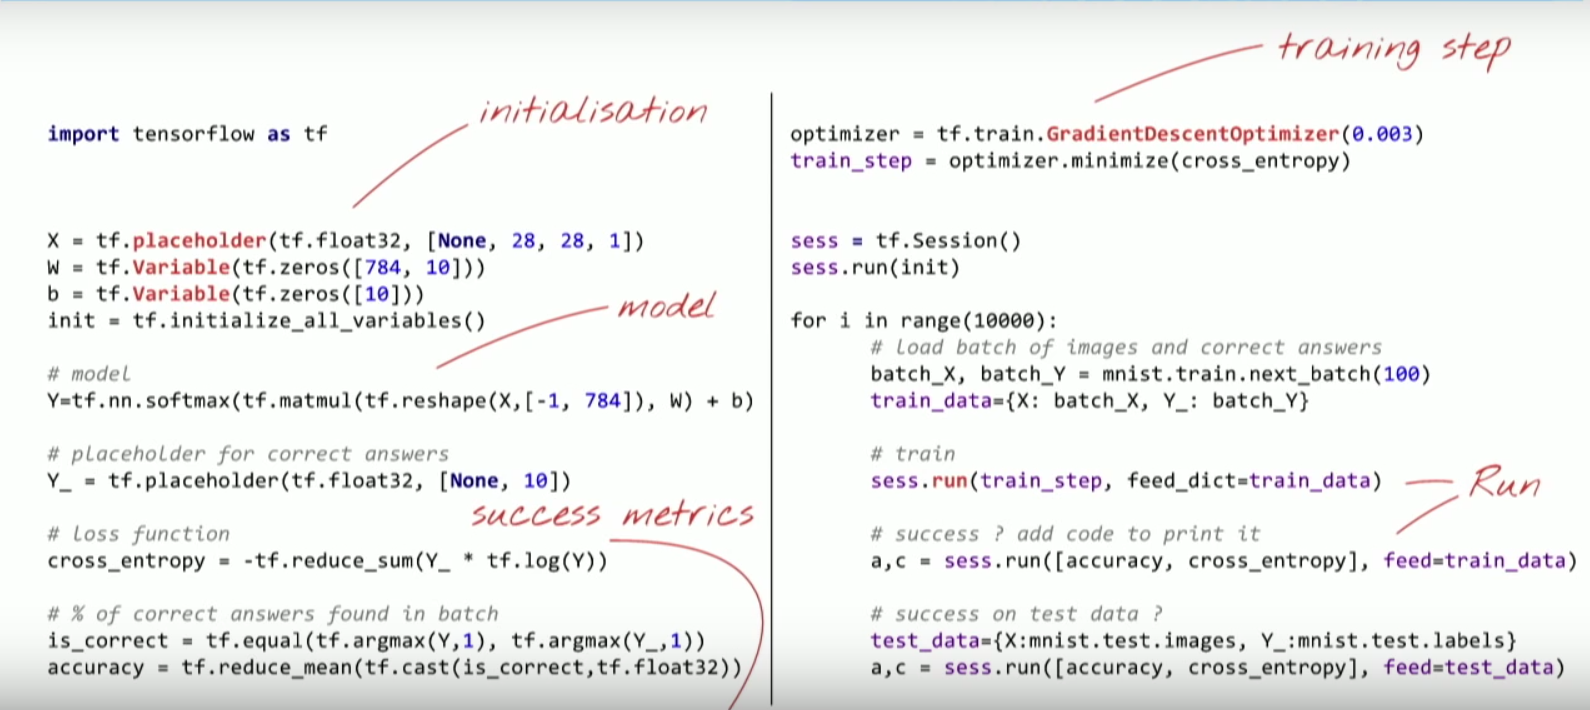

In [4]:
tf.nn.softmax([1., 2., 3., 4., 5.])

<tf.Tensor 'Reshape_4:0' shape=(5,) dtype=float32>

In [17]:
sess = tf.Session()
print (sess.run(tf.nn.softmax([[1., 2., 3., 4., 5.], [1., 2., 3., 4., 5.]])))
#sess.close()

[[ 0.01165623  0.03168492  0.08612854  0.23412165  0.63640863]
 [ 0.01165623  0.03168492  0.08612854  0.23412165  0.63640863]]


In [35]:
#X = tf.placeholder(tf.float32, [None, 28, 28, 1])
X = tf.placeholder(tf.float32, [None, 784]) # depending on the input data
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

#init = tf.initialize_all_variables()
init = tf.global_variables_initializer() # use this instead

In [36]:
# model
Y = tf.nn.softmax(tf.matmul(tf.reshape(X, [-1, 784]), W) + b)

# placeholder for correct answers
Y_ = tf.placeholder(tf.float32, [None, 10])

# loss function
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

# % of correct answers found in batch
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [37]:
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

In [38]:
# have to import mnist data first
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [41]:
sess = tf.Session()
sess.run(init)

for i in range(1000):
    # load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data = {X:batch_X, Y_: batch_Y}
    #print(batch_X.shape)
    
    # train
    sess.run(train_step, feed_dict = train_data)
    
    # sucess?
    a, c = sess.run([accuracy, cross_entropy], feed_dict = train_data)
    print ('train {}'.format(i))
    print (a, c)
    
    # success on test data?
    test_data = {X:mnist.test.images, Y_: mnist.test.labels}
    a, c = sess.run([accuracy, cross_entropy], feed_dict = test_data)
    print ('test {}'.format(i))
    print (a, c)

train 0
0.38 185.258
test 0
0.2382 20567.7
train 1
0.64 164.556
test 1
0.4529 18130.5
train 2
0.72 147.987
test 2
0.5996 16128.9
train 3
0.71 133.794
test 3
0.6128 14904.1
train 4
0.81 130.671
test 4
0.7559 13394.8
train 5
0.78 120.123
test 5
0.7124 12751.1
train 6
0.75 104.457
test 6
0.6317 12377.2
train 7
0.69 100.444
test 7
0.6919 11255.3
train 8
0.86 92.333
test 8
0.7923 10348.4
train 9
0.86 91.5404
test 9
0.7842 10022.3
train 10
0.78 91.6595
test 10
0.7787 9569.49
train 11
0.86 95.5971
test 11
0.8344 9116.04
train 12
0.81 90.4167
test 12
0.8426 8681.59
train 13
0.82 84.7632
test 13
0.8244 8454.89
train 14
0.88 72.9859
test 14
0.8144 8345.72
train 15
0.81 74.2874
test 15
0.8183 8007.74
train 16
0.83 75.24
test 16
0.7667 8477.45
train 17
0.91 66.3683
test 17
0.8388 7497.24
train 18
0.87 67.8529
test 18
0.8394 7337.41
train 19
0.87 71.2111
test 19
0.8412 7169.03
train 20
0.9 57.444
test 20
0.8356 7093.29
train 21
0.91 59.5596
test 21
0.831 6964.95
train 22
0.87 64.3722
test 22
0.8554

test 189
0.8951 3818.93
train 190
0.92 33.6403
test 190
0.898 3731.57
train 191
0.91 31.439
test 191
0.8989 3706.14
train 192
0.91 37.6177
test 192
0.8979 3718.88
train 193
0.9 34.175
test 193
0.8996 3684.14
train 194
0.86 41.6921
test 194
0.9002 3676.21
train 195
0.9 36.0068
test 195
0.895 3812.24
train 196
0.88 30.7935
test 196
0.9008 3650.33
train 197
0.94 26.8034
test 197
0.8988 3711.0
train 198
0.9 49.4494
test 198
0.8992 3669.56
train 199
0.86 45.21
test 199
0.8969 3752.53
train 200
0.87 38.6125
test 200
0.8984 3689.58
train 201
0.9 38.0346
test 201
0.8944 3720.21
train 202
0.9 46.6089
test 202
0.8969 3685.92
train 203
0.95 27.0736
test 203
0.8986 3683.04
train 204
0.91 42.6718
test 204
0.9027 3625.09
train 205
0.92 30.5506
test 205
0.9023 3631.38
train 206
0.91 35.1215
test 206
0.9025 3610.13
train 207
0.95 28.4923
test 207
0.8996 3678.27
train 208
0.9 34.5386
test 208
0.9019 3624.25
train 209
0.9 33.5914
test 209
0.9028 3591.47
train 210
0.92 26.1712
test 210
0.8991 3665.29
tra

test 374
0.9082 3362.4
train 375
0.89 37.8483
test 375
0.9078 3356.73
train 376
0.94 24.5347
test 376
0.9081 3300.05
train 377
0.93 31.7718
test 377
0.9101 3294.51
train 378
0.91 27.278
test 378
0.9095 3294.97
train 379
0.93 29.4124
test 379
0.9107 3269.0
train 380
0.91 29.7466
test 380
0.9093 3304.29
train 381
0.89 36.8128
test 381
0.9105 3269.38
train 382
0.88 28.1124
test 382
0.9081 3288.69
train 383
0.91 36.9733
test 383
0.9097 3261.6
train 384
0.89 35.9724
test 384
0.91 3254.84
train 385
0.88 43.2609
test 385
0.9093 3284.42
train 386
0.9 35.1947
test 386
0.9084 3339.79
train 387
0.86 41.2403
test 387
0.908 3379.02
train 388
0.94 26.2733
test 388
0.9103 3283.05
train 389
0.95 23.203
test 389
0.9105 3304.89
train 390
0.87 42.2199
test 390
0.9079 3360.79
train 391
0.92 33.9508
test 391
0.9115 3284.83
train 392
0.91 25.5312
test 392
0.9107 3295.24
train 393
0.92 24.6353
test 393
0.9095 3285.53
train 394
0.93 25.1784
test 394
0.908 3299.53
train 395
0.92 31.5336
test 395
0.9076 3294.12

test 559
0.9099 3178.82
train 560
0.91 32.7129
test 560
0.9128 3138.04
train 561
0.92 22.3733
test 561
0.9147 3118.05
train 562
0.91 28.1423
test 562
0.9141 3116.76
train 563
0.94 23.7484
test 563
0.913 3142.67
train 564
0.85 42.7303
test 564
0.9113 3166.78
train 565
0.94 33.7348
test 565
0.9136 3144.94
train 566
0.94 19.1267
test 566
0.9146 3141.33
train 567
0.95 22.2833
test 567
0.9112 3168.66
train 568
0.95 23.0063
test 568
0.9096 3174.98
train 569
0.93 32.5688
test 569
0.9107 3137.07
train 570
0.95 25.8271
test 570
0.913 3119.05
train 571
0.92 33.3969
test 571
0.9136 3108.14
train 572
0.91 27.0649
test 572
0.914 3121.3
train 573
0.93 24.8983
test 573
0.913 3135.47
train 574
0.95 23.2701
test 574
0.9124 3128.93
train 575
0.96 21.4501
test 575
0.9127 3128.41
train 576
0.94 24.3097
test 576
0.9125 3122.35
train 577
0.89 37.5871
test 577
0.9128 3125.9
train 578
0.93 29.8032
test 578
0.9139 3138.81
train 579
0.93 25.2486
test 579
0.9153 3112.06
train 580
0.92 30.6046
test 580
0.9139 310

test 737
0.9149 3105.5
train 738
0.91 34.7713
test 738
0.9122 3156.59
train 739
0.97 17.4569
test 739
0.9113 3184.62
train 740
0.93 29.0906
test 740
0.9127 3095.16
train 741
0.93 29.5684
test 741
0.9152 3066.32
train 742
0.92 24.5329
test 742
0.9147 3043.4
train 743
0.93 26.6284
test 743
0.914 3084.64
train 744
0.95 22.624
test 744
0.913 3079.54
train 745
0.87 45.5487
test 745
0.913 3059.27
train 746
0.92 30.7938
test 746
0.9132 3089.66
train 747
0.93 22.1817
test 747
0.9121 3150.44
train 748
0.86 39.7484
test 748
0.9146 3045.31
train 749
0.94 30.2725
test 749
0.9147 3054.08
train 750
0.95 21.2001
test 750
0.9146 3051.0
train 751
0.94 24.9249
test 751
0.9136 3065.36
train 752
0.92 32.3124
test 752
0.9142 3074.51
train 753
0.89 31.713
test 753
0.914 3043.86
train 754
0.95 17.3637
test 754
0.9135 3035.11
train 755
0.89 36.3021
test 755
0.9146 3022.48
train 756
0.92 28.5876
test 756
0.9158 3037.89
train 757
0.93 30.2585
test 757
0.9151 3063.7
train 758
0.95 22.9899
test 758
0.9151 3069.04

test 918
0.9168 2986.31
train 919
0.92 26.8346
test 919
0.9176 2979.17
train 920
0.9 29.9766
test 920
0.9169 2990.94
train 921
0.93 25.7035
test 921
0.9179 2983.05
train 922
0.93 26.0227
test 922
0.9178 2980.78
train 923
0.9 33.9957
test 923
0.9166 3009.15
train 924
0.95 20.3813
test 924
0.9176 2986.77
train 925
0.92 29.3908
test 925
0.9185 2964.91
train 926
0.92 30.3793
test 926
0.9201 2952.41
train 927
0.93 29.7246
test 927
0.9186 2974.9
train 928
0.91 32.31
test 928
0.9165 3060.32
train 929
0.87 43.4096
test 929
0.9153 3051.6
train 930
0.97 17.7476
test 930
0.9132 3086.37
train 931
0.92 40.213
test 931
0.9149 3016.9
train 932
0.96 21.7903
test 932
0.915 2998.51
train 933
0.93 33.1696
test 933
0.9153 2996.92
train 934
0.95 18.4035
test 934
0.915 3008.23
train 935
0.95 17.76
test 935
0.9162 2992.4
train 936
0.96 21.9493
test 936
0.9152 3009.4
train 937
0.91 32.5675
test 937
0.9172 2984.15
train 938
0.93 25.9271
test 938
0.9162 2978.25
train 939
0.88 46.0769
test 939
0.9168 2984.64
tra